In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('weight-height.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.shape

(10000, 3)

In [6]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


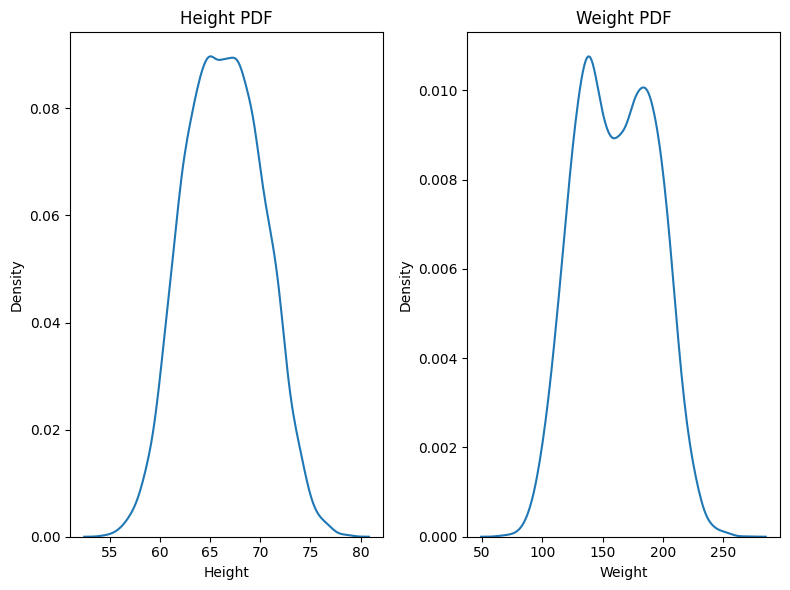

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(8,6))
sns.kdeplot(df['Height'], ax=axs[0])
axs[0].set_title('Height PDF')

sns.kdeplot(df['Weight'], ax=axs[1])
axs[1].set_title('Weight PDF')

plt.tight_layout()

### We're gonna apply the Percentile-Based Outlier treatment on the height column only since it shows a normal distirbution. 
### The weight column shows a bimodial distribution

<Axes: xlabel='Height'>

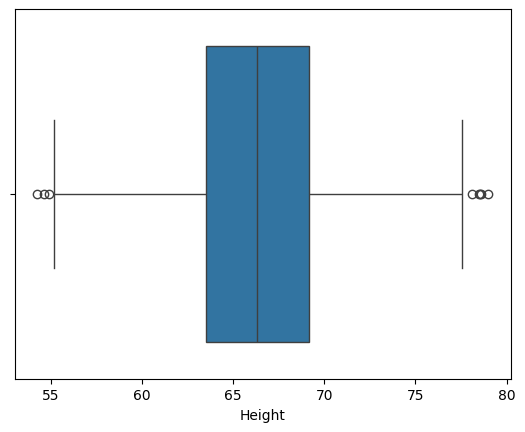

In [9]:
sns.boxplot(x=df['Height'])

In [10]:
upper = df['Height'].quantile(0.99)
lower = df['Height'].quantile(0.01)
print(f"Upper Limit: {upper}")
print(f"Lower Limit: {lower}")

Upper Limit: 74.7857900583366
Lower Limit: 58.13441158671655


In [11]:
df[(df['Height'] <= lower) | (df['Height'] >= upper)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [12]:
new_df = df[(df['Height'] >= lower) & (df['Height'] <= upper)]

In [13]:
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [14]:
new_df.describe()

,Height,Weight
count,9800.000000,9800.000000
mean,66.364366,161.399489
std,3.645075,30.933549
min,58.134496,77.523774
25%,63.577162,136.322717
50%,66.318070,161.212928
75%,69.119896,186.753317
max,74.785714,249.946283


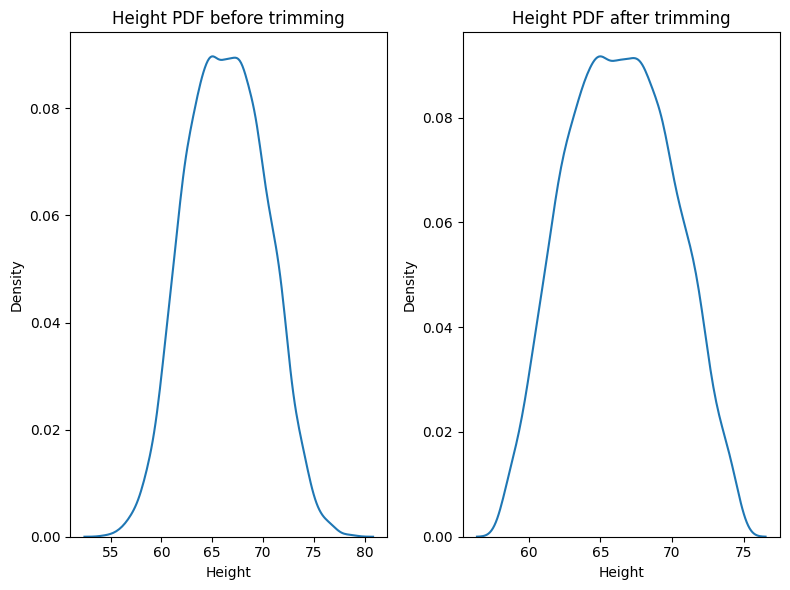

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(8,6))
sns.kdeplot(df['Height'], ax=axs[0])
axs[0].set_title('Height PDF before trimming')

sns.kdeplot(new_df['Height'], ax=axs[1])
axs[1].set_title('Height PDF after trimming')

plt.tight_layout()

<Axes: xlabel='Height'>

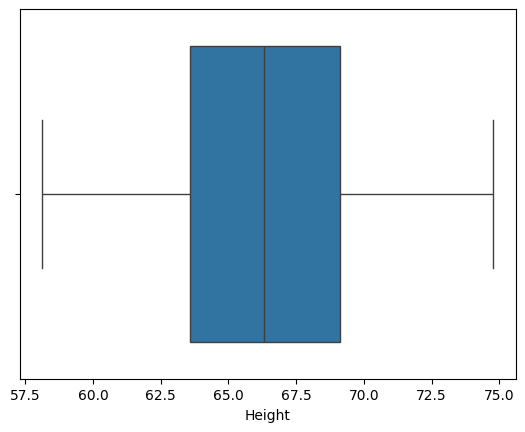

In [16]:
sns.boxplot(x=new_df['Height'])

### Capping-also known as winsorization in this scenario

In [18]:
df2 = df.copy()

In [19]:
df2['Height'] = np.where(df2['Height'] >= upper,
                        upper,
                        np.where(df2['Height'] <= lower,
                                 lower,
                                 df2['Height'])
                       )

In [20]:
df2.shape

(10000, 3)

In [21]:
df2.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.366281,161.440357
std,3.795717,32.108439
min,58.134412,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,74.785790,269.989699


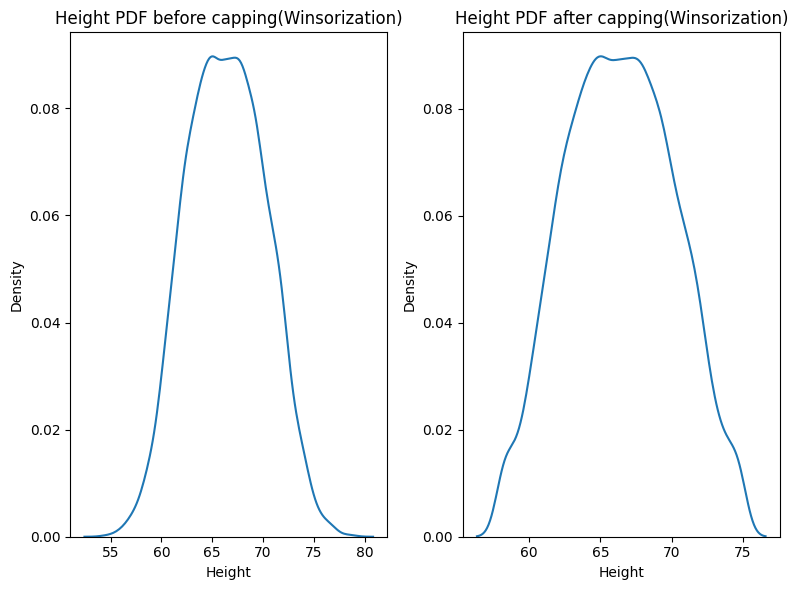

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(8,6))
sns.kdeplot(df['Height'], ax=axs[0])
axs[0].set_title('Height PDF before capping(Winsorization)')

sns.kdeplot(df2['Height'], ax=axs[1])
axs[1].set_title('Height PDF after capping(Winsorization)')

plt.tight_layout()

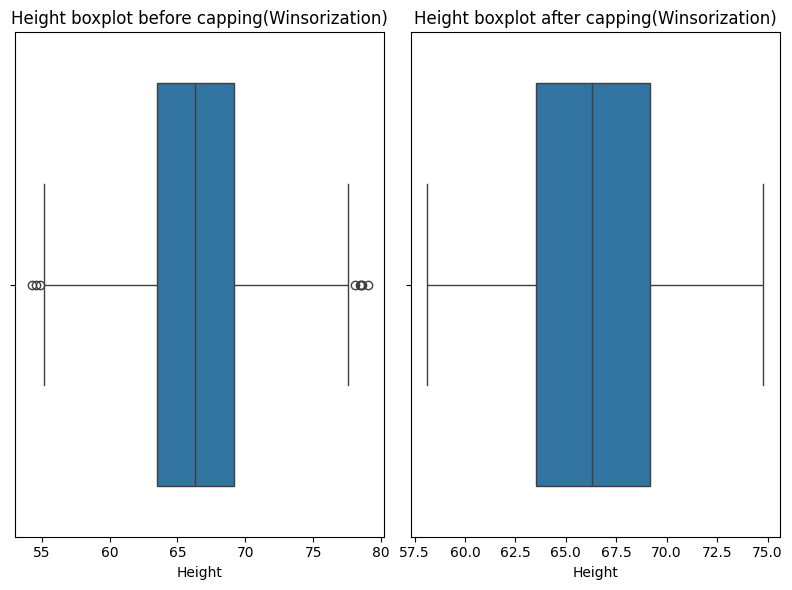

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(8,6))
sns.boxplot(x=df['Height'], ax=axs[0])
axs[0].set_title('Height boxplot before capping(Winsorization)')

sns.boxplot(x=df2['Height'], ax=axs[1])
axs[1].set_title('Height boxplot after capping(Winsorization)')

plt.tight_layout()